# N-GRAM MODEL

In [ ]:
# A piece of code(idea) taken from the github and youtube
#referecne : https://github.com/JamieBali and https://www.youtube.com/watch?v=MZIm_5NN3MY&t=446s
#import libraries
import pandas as pd
import os,csv,random

In [ ]:
#create N-Gram model
unigram = bigram = trigram = quadrigram = {}
 
#Load file directory from local 
TRAIN_DIR = r"C:\Users\ps509\Downloads\lab2resources\lab2resources\sentence-completion\Holmes_Training_Data"
filenames=os.listdir(TRAIN_DIR) 
print(len(filenames))
#check the length of total file

522


In [ ]:
data_set = []

## Data Pre- processing

In [ ]:

for d in range(0, len(filenames)):
  try:
    doc = filenames[d]
    print(d)
    full_doc = ""
    with open(os.path.join(TRAINING_DIR, doc)) as instream:
      for line in instream:
        full_doc += line[:-1] + " "   
    full_doc = full_doc.split(" ")
    tokens = ["__END","__START"]
# we remove 2 charcater and in total n characher from the end

    #we start the tokenisatin process converting into ngram
    #ignore blank space and remove punctuation 
    for token in full_doc:
      word = token
      if len(word) > 0 and not word == "\"": 
        if word[-1] == "\"": 
          word = word[:-1]
        if word[0] == "\"": 
          word = word[1:]
        if word[-1] == "." or word[-1] == "!" or word[-1] == "?": 
          tokens.append(word[:-1])
          tokens.append(word[-1])
          tokens.append("__END")
          tokens.append("__START")
        elif word[-1] == "," or word[-1] == ";":
          tokens.append(word[:-1])
          tokens.append(word[-1])
        elif not word == "":
          tokens.append(word)

    
    # building ngram with all documents
    for i in range(len(tokens)):
      unigram[tokens[i]] = unigram.get(tokens[i], 0) + 1 #indexing tokens and adding one more tokens
      if i < len(tokens) - 1:
        if not tokens[i] in bigram:
          bigram[tokens[i]] = {}
        bigram[tokens[i]][tokens[i+1]] = bigram[tokens[i]].get(tokens[i+1], 0) + 1
      if i < len(tokens) - 2:
        if not tokens[i] in trigram:
          trigram[tokens[i]] = {}
        if not tokens[i+1] in trigram[tokens[i]]:
          trigram[tokens[i]][tokens[i+1]] = {}
        trigram[tokens[i]][tokens[i+1]][tokens[i+2]] = trigram[tokens[i]][tokens[i+1]].get(tokens[i+2], 0) + 1
      if i < len(tokens) - 3:
        if not tokens[i] in quadrigram:
          quadrigram[tokens[i]] = {}
        if not tokens[i+1] in quadrigram[tokens[i]]:
          quadrigram[tokens[i]][tokens[i+1]] = {}
        if not tokens[i+2] in quadrigram[tokens[i]][tokens[i+1]]:
          quadrigram[tokens[i]][tokens[i+1]][tokens[i+2]] = {}
        quadrigram[tokens[i]][tokens[i+1]][tokens[i+2]][tokens[i+3]] = quadrigram[tokens[i]][tokens[i+1]][tokens[i+2]].get(tokens[i+3], 0) + 1
  except:
    print("error in file " + filenames[d])



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
sum = 0
for x in unigram:
  sum += unigram[x]
for x in unigram:
  unigram[x] /= sum

for x in bigram:
  sum = 0
  for y in bigram[x]:
    sum += bigram[x][y]
  for y in bigram[x]:
    bigram[x][y] = bigram[x][y] / sum

for x in trigram:
  for y in trigram[x]:
    sum = 0
    for z in trigram[x][y]:
      sum += trigram[x][y][z]
    for z in trigram[x][y]:
      trigram[x][y][z] /= sum

for x in quadrigram:
  for y in quadrigram[x]:
    for z in quadrigram[x][y]:
      sum = 0
      for t in quadrigram[x][y][z]:
        sum += quadrigram[x][y][z][t]
      for t in quadrigram[x][y][z]:
        quadrigram[x][y][z][t] /= sum

## Sentence completion challenge

In [ ]:
#upload the questions and answers from the directory
questions=os.path.join(r"C:\Users\ps509\Downloads\lab2resources\lab2resources\sentence-completion\testing_data.csv")
answers=os.path.join(r"C:\Users\ps509\Downloads\lab2resources\lab2resources\sentence-completion\test_answer.csv")
with open(questions) as instream:
  csvreader=csv.reader(instream)
  lines=list(csvreader)
qs_df=pd.DataFrame(lines[1:],columns=lines[0])
qs_df.head()

,id,question,a),b),c),d),e)
0,1,I have it from the same source that you are bo...,crying,instantaneously,residing,matched,walking
1,2,It was furnished partly as a sitting and partl...,daintily,privately,inadvertently,miserably,comfortably
2,3,"As I descended , my old ally , the _____ , cam...",gods,moon,panther,guard,country-dance
3,4,"We got off , _____ our fare , and the trap rat...",rubbing,doubling,paid,naming,carrying
4,5,"He held in his hand a _____ of blue paper , sc...",supply,parcel,sign,sheet,chorus


In [ ]:
def left_context(sentence):
  sent = ["_END", "_START"] + sentence.split(" ")
  last = "_START"
  twolast = "_END"
  for i in range(2, len(sent)):
    if sent[i] == "_____":
      return sent[i-3], sent[i-2], sent[i-1]
#getiing left word
results = []
for num in range(0, len(qs_df["question"])):
  sentence = qs_df["question"][num]
  options = []
  options.append(qs_df["a)"][num])
  options.append(qs_df["b)"][num])
  options.append(qs_df["c)"][num])
  options.append(qs_df["d)"][num])
  options.append(qs_df["e)"][num])
  guesses = []
  c1, c2, c3 = left_context(sentence)
  for option in options:
    try:
      guesses.append(quadrigram[c1][c2][c3][option])
    except:
      guesses.append(0)
  greater = False
  highest = 0
  res = ""
  if guesses[0] > highest:
    greater = True
    res = "a"
    highest = guesses[0]
  if guesses[1] > highest:
    greater = True
    res = "b"
    highest = guesses[1]
  if guesses[2] > highest:
    greater = True
    res = "c"
    highest = guesses[2]
  if guesses[3] > highest:
    greater = True
    res = "d"
    highest = guesses[3]
  if guesses[4] > highest:
    greater = True
    res = "e"
    highest = guesses[4]
  if greater == True:
    results.append(res)
    data_set.append(num)
  else:
    print("UNFOUND")
    results.append(random.choice(["a","b","c","d","e"]))

UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND


## Quadrigram

In [ ]:
with open(answers) as instream:
  csvreader=csv.reader(instream)
  lines=list(csvreader)
ans_df=pd.DataFrame(lines[1:],columns=lines[0])
ans_df.head()
answer_list = []
for x in as_df["answer"]:
  answer_list.append(x)

In [ ]:
sum = 0
for x in data_set:
  if answer_list[x] == results[x]:
    sum += 1
print(sum / len(data_set))


# quadrigram has 45% accuracy

0.44654088050314467


## Quadrigram plot

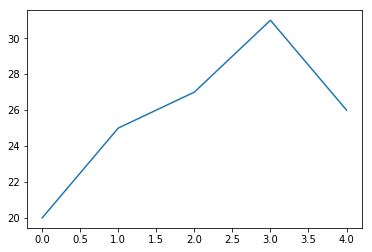

In [ ]:
data_f = pd.DataFrame([20,25,27,31,26], index=[0, 1, 2, 3, 4])
data_f.plot(legend=False)

## Trigram


In [ ]:
def left_context(sentence):
  sent = ["_END", "_START"] + sentence.split(" ")
  last = "_START"
  twolast = "_END"
  for i in range(2, len(sent)):
    if sent[i] == "_____":
      return sent[i-3], sent[i-2], sent[i-1]

results = []
for num in range(0, len(qs_df["question"])):
  sentence = qs_df["question"][num]
  options = []
  options.append(qs_df["a)"][num])
  options.append(qs_df["b)"][num])
  options.append(qs_df["c)"][num])
  options.append(qs_df["d)"][num])
  options.append(qs_df["e)"][num])
  guesses = []
  c1, c2, c3 = get_left_context(sentence)
  for option in options:
    try:
      guesses.append(trigram[c1][c2][c3][option])
    except:
      guesses.append(0)
  greater = False
  highest = 0
  res = ""
  if guesses[0] > highest:
    greater = True
    res = "a"
    highest = guesses[0]
  if guesses[1] > highest:
    greater = True
    res = "b"
    highest = guesses[1]
  if guesses[2] > highest:
    greater = True
    res = "c"
    highest = guesses[2]
  if guesses[3] > highest:
    greater = True
    res = "d"
    highest = guesses[3]
  if guesses[4] > highest:
    greater = True
    res = "e"
    highest = guesses[4]
  if greater == True:
    results.append(res)
    data_set.append(num)
  else:
    print("UNFOUND")
    results.append(random.choice(["a","b","c","d","e"]))

UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND


In [ ]:
with open(answers) as instream:
  csvreader=csv.reader(instream)
  lines=list(csvreader)
ans_df=pd.DataFrame(lines[1:],columns=lines[0])
ans_df.head()
answer_list = []
for x in as_df["answer"]:
  answer_list.append(x)

In [ ]:
sum = 0
for x in data_set:
  if answer_list[x] == results[x]:
    sum += 1
print(sum / len(data_set))


# Trigram has 19% accuracy

0.18553459119496854


## Bigram

In [ ]:
def left_context(sentence):
  sent = ["_END", "_START"] + sentence.split(" ")
  last = "_START"
  twolast = "_END"
  for i in range(2, len(sent)):
    if sent[i] == "_____":
      return sent[i-3], sent[i-2], sent[i-1]

results = []
for num in range(0, len(qs_df["question"])):
  sentence = qs_df["question"][num]
  options = []
  options.append(qs_df["a)"][num])
  options.append(qs_df["b)"][num])
  options.append(qs_df["c)"][num])
  options.append(qs_df["d)"][num])
  options.append(qs_df["e)"][num])
  guesses = []
  c1, c2, c3 = get_left_context(sentence)
  for option in options:
    try:
      guesses.append(bigram[c1][c2][c3][option])
    except:
      guesses.append(0)
  greater = False
  highest = 0
  res = ""
  if guesses[0] > highest:
    greater = True
    res = "a"
    highest = guesses[0]
  if guesses[1] > highest:
    greater = True
    res = "b"
    highest = guesses[1]
  if guesses[2] > highest:
    greater = True
    res = "c"
    highest = guesses[2]
  if guesses[3] > highest:
    greater = True
    res = "d"
    highest = guesses[3]
  if guesses[4] > highest:
    greater = True
    res = "e"
    highest = guesses[4]
  if greater == True:
    results.append(res)
    data_set.append(num)
  else:
    print("UNFOUND")
    results.append(random.choice(["a","b","c","d","e"]))

UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND
UNFOUND


In [ ]:
with open(answers) as instream:
  csvreader=csv.reader(instream)
  lines=list(csvreader)
ans_df=pd.DataFrame(lines[1:],columns=lines[0])
ans_df.head()
answer_list = []
for x in as_df["answer"]:
  answer_list.append(x)

In [ ]:
sum = 0
for x in data_set:
  if answer_list[x] == results[x]:
    sum += 1
print(sum / len(data_set))


# Bigram has 18% accuracy

0.18238993710691823


## Ngram plot

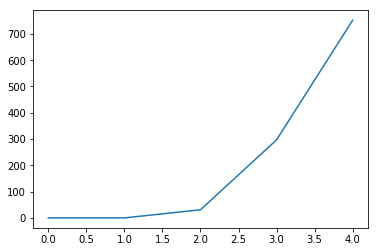

In [ ]:
data_f = pd.DataFrame([0, 0, 31, 297, 752])
data_f.plot(legend=False)